In [1]:
print("coucou")

coucou

In [2]:
using Polyhedra
using JuMP
using LinearAlgebra
using Gurobi #, Cbc, GLPK
using Plots
using LaTeXStrings
using JLD

In [8]:
include("../lib/linear_system_v3.jl")
print("Done")

Done

In [9]:
include("../lib/fixed_height_planar_lipm.jl")
print("Done")

Done

In [10]:
include("../lib/utils_MILP.jl");
print("Done")

Done

In [11]:
T_max=18
N_m=5
N_c=5

enforceRegular=false

false

In [12]:
system, _ = get_lipm(T_max)

if !check(system)
    print("ERROR in dimensions of the system\n")
end

n_x=x_dim(system)
n_y=y_dim(system)
n_z=z_dim(system)
n_u=u_dim(system)

Estimated error in calculating first entry of discretized B: 6.938893903907228e-18
Estimated error in calculating second entry of discretized B: 0.0


1

In [7]:
# use binary search to solve the ALAP problem
time_beginning=time_ns()

ASAPmodel, T_opt, C_bar_ASAP, S_ASAP=binarySearchALAP(system,N_m,N_c,T_max;enforceRegular=enforceRegular)

time_ending=time_ns()
solving_time=(time_ending-time_beginning)/1e9
print("\n\n==== Solving time = $(solving_time) seconds ====\n\n")


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 202 rows, 125 columns and 412 nonzeros
Model fingerprint: 0xf4c48c64
Variable types: 123 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [3e-02, 1e+06]
  Objective range  [0e+00, 0e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
Presolve removed 174 rows and 78 columns
Presolve time: 0.01s
Presolved: 28 rows, 47 columns, 116 nonzeros
Variable types: 47 continuous, 0 integer (0 binary)

Root relaxation: objective 0.000000e+00, 16 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0       0.0000000    0.00000  0.00%     -    0s

Explored 0 nodes (16 simplex iterations) in 0



==== Solving time = 319.090339526 seconds ====



In [8]:
F, f, sigma_meas_opt, sigma_control_opt, P_z_all, z_tilde, P_u_all, u_tilde, polEta=getResultsALAP(system, ASAPmodel,T_max, C_bar_ASAP,S_ASAP,N_m,N_c,T_opt; enforceRegular=enforceRegular);

In [9]:
# compute bounds on z and u and bounds of S_t
lower_bounds_z, upper_bounds_z, lower_bounds_u, upper_bounds_u, lower_bounds_S, upper_bounds_S, lower_bounds_U, upper_bounds_U = computeBounds(system, value.(P_z_all), value.(z_tilde), value.(P_u_all), value.(u_tilde), polEta);


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only


 === Compute bounds on z for entry 1 ===

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Model fingerprint: 0x3ecb1e9f
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 148 rows and 74 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -1.000000000e-01

User-callback calls 24, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix ran

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-02, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -2.2649500e+30   1.040000e+31   2.264950e+00      0s
       8   -8.6424659e-01   0.000000e+00   0.000000e+00      0s

Solved in 8 iterations and 0.00 seconds
Optimal objective -8.642465915e-01

User-callback calls 531, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-02, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8430767e+30   1.972000e+31   8.843077e+00      

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [2e-02, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.3787230e+30   1.400000e+31   1.378723e+00      0s
      11   -7.6840836e-01   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.00 seconds
Optimal objective -7.684083563e-01

User-callback calls 1195, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [2e-02, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5770293e+30   3.940000e+31   6.577029e+00    

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-20, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.8037400e+30   1.320000e+31   4.803740e+00      0s
       9   -1.2765224e+00   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds
Optimal objective -1.276522380e+00

User-callback calls 1996, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-20, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0170764e+31   5.316000e+31   1.017076e+01     

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [2e-16, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -9.6123473e+30   5.000000e+30   9.612347e+00      0s
       5   -1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.00 seconds
Optimal objective -1.000000000e+00

User-callback calls 2836, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [2e-16, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0345125e+31   1.516000e+31   1.034512e+01     

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-20, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -8.0361853e+30   3.180000e+31   8.036185e+00      0s
      28   -1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 28 iterations and 0.00 seconds
Optimal objective -1.000000000e+00

User-callback calls 3480, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 148 rows, 74 columns and 148 nonzeros
Coefficient statistics:
  Matrix range     [1e+01, 1e+02]
  Objective range  [1e-20, 7e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0361853e+30   3.876000e+31   8.036185e+00    

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -5.000000000e+00

User-callback calls 57, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+30   1.000000e+30   2.500000e+00      0s
       1    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved 

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -5.000000000e+00

User-callback calls 57, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+30   1.000000e+30   2.500000e+00      0s
       1    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved 

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -5.000000000e+00

User-callback calls 57, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+30   1.000000e+30   2.500000e+00      0s
       1    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved 

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -5.000000000e+00

User-callback calls 57, time in user-callback 0.00 sec
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 4 rows, 2 columns and 4 nonzeros
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+30   1.000000e+30   2.500000e+00      0s
       1    5.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved 

In [10]:
# generate trajectories
z,u=simulateTrajectories(system,F,f;numberSamples=1000);

Compute V-representation of W... Done.
Compute V-representation of V... Done.
Compute V-representation of X0... Done.


In [11]:
# plot trajectories
plotList=[]
component=1

# First component with a legend
p=plot(0:T_max,z[:,component,:]',label=false)    
plot!(0:T_max,lower_bounds_z[component,:],fillrange=upper_bounds_z[component,:],fillalpha=.3,alpha=.25,color=:green,linewidth=0,label=false)

xlabel!(L"t")
ylabel!(latexstring("\$x^{cm}_t\$"))

plot!(0:T_max,lower_bounds_S[component,:],linecolor=:red, label=false)
plot!(0:T_max,upper_bounds_S[component,:],linecolor=:red, label=false)

t_meas=findall(sigma_meas_opt.==1).-1
scatter!(t_meas,ones(length(t_meas))*maximum(upper_bounds_S[component,:]),label=false,marker=:hexagon,color=:blue)

t_control=findall(sigma_control_opt.==1).-1
scatter!(t_control,ones(length(t_control))*minimum(lower_bounds_S[component,:]),color=:orange,label=false)

xticks!(0:T_max)

plot!([T_opt T_opt]',[minimum(lower_bounds_S[component,:]) maximum(upper_bounds_S[component,:])]',linecolor=:black,label=false,linestyle = :dash)

plotList=[plotList; p]

# plot z without legends
for component=2:n_z
    p=plot(0:T_max,z[:,component,:]',label=false)    
    plot!(0:T_max,lower_bounds_z[component,:],fillrange=upper_bounds_z[component,:],fillalpha=.25,alpha=.25,color=:green,linewidth=0,label=false)

    xlabel!(L"t")
    ylabel!(latexstring("\$\\dot{x}^{cm}_t\$"))

    plot!(0:T_max,lower_bounds_S[component,:],linecolor=:red, label=false)
    plot!(0:T_max,upper_bounds_S[component,:],linecolor=:red, label=false)

    t_meas=findall(sigma_meas_opt.==1).-1
    scatter!(t_meas,ones(length(t_meas))*maximum(upper_bounds_S[component,:]),label=false,marker=:hexagon,color=:blue)

    t_control=findall(sigma_control_opt.==1).-1
    scatter!(t_control,ones(length(t_control))*minimum(lower_bounds_S[component,:]),color=:orange,label=false)
    
    plot!([T_opt T_opt]',[minimum(lower_bounds_S[component,:]) maximum(upper_bounds_S[component,:])]',linecolor=:black,label=false,linestyle=:dash)
    
    xticks!(0:T_max)
    plotList=[plotList; p]
end

In [12]:
# plot control inputs

# no legend
for component=1:n_u-1
    p=plot(0:T_max-1,lower_bounds_u[component,:],fillrange=upper_bounds_u[component,:],fillalpha=.25,alpha=.25,linewidth=0,color=:green,label=false)
    plot!(0:T_max-1,u[:,component,:]',label=false)    

    xlabel!(L"t")
    ylabel!(latexstring("\$u^"*string(component)*"_t\$"))
    
    plot!(0:T_max-1,ones(T_max)*lower_bounds_U[component],linecolor=:red, label=false)
    plot!(0:T_max-1,ones(T_max)*upper_bounds_U[component],linecolor=:red, label=false)

    t_meas=findall(sigma_meas_opt.==1).-1
    scatter!(t_meas,upper_bounds_U[component]*ones(length(t_meas)),label=false,marker=:hexagon,color=:blue)

    t_control=findall(sigma_control_opt.==1).-1
    scatter!(t_control,lower_bounds_U[component]*ones(length(t_control)),color=:orange,label=false)
    
    plot!([T_opt T_opt]',[lower_bounds_U[component] upper_bounds_U[component]]',linecolor=:black,label=false,linestyle = :dash)
    
    xticks!(0:T_max)
    
    plotList=[plotList; p]
end

component=n_u

# First component with a legend
p=plot(0:T_max-1,lower_bounds_u[component,:],fillrange=upper_bounds_u[component,:],fillalpha=.3,alpha=.25,color=:green,linewidth=0,label="Possible values")
plot!(0:T_max-1,u[:,component,:]',label=false)

xlabel!(L"t")
ylabel!(latexstring("\$u_t\$"))

plot!(0:T_max-1,ones(T_max)*lower_bounds_U[component],linecolor=:red, label=L"\partial\mathcal{Z}, \partial\mathcal{U}")
plot!(0:T_max-1,ones(T_max)*upper_bounds_U[component],linecolor=:red, label=false)

t_meas=findall(sigma_meas_opt.==1).-1
scatter!(t_meas,upper_bounds_U[component]*ones(length(t_meas)),label="Measurement times",marker=:hexagon,color=:blue)

t_control=findall(sigma_control_opt.==1).-1
scatter!(t_control,lower_bounds_U[component]*ones(length(t_control)),color=:orange,label="Control times")

plot!([T_opt T_opt]',[lower_bounds_U[component] upper_bounds_U[component]]',linecolor=:black,label=L"T^*",linestyle = :dash)

xticks!(0:T_max)
plotList=[plotList; p]

3-element Array{Any,1}:
 Plot{Plots.GRBackend() n=1006}
 Plot{Plots.GRBackend() n=1006}
 Plot{Plots.GRBackend() n=1006}

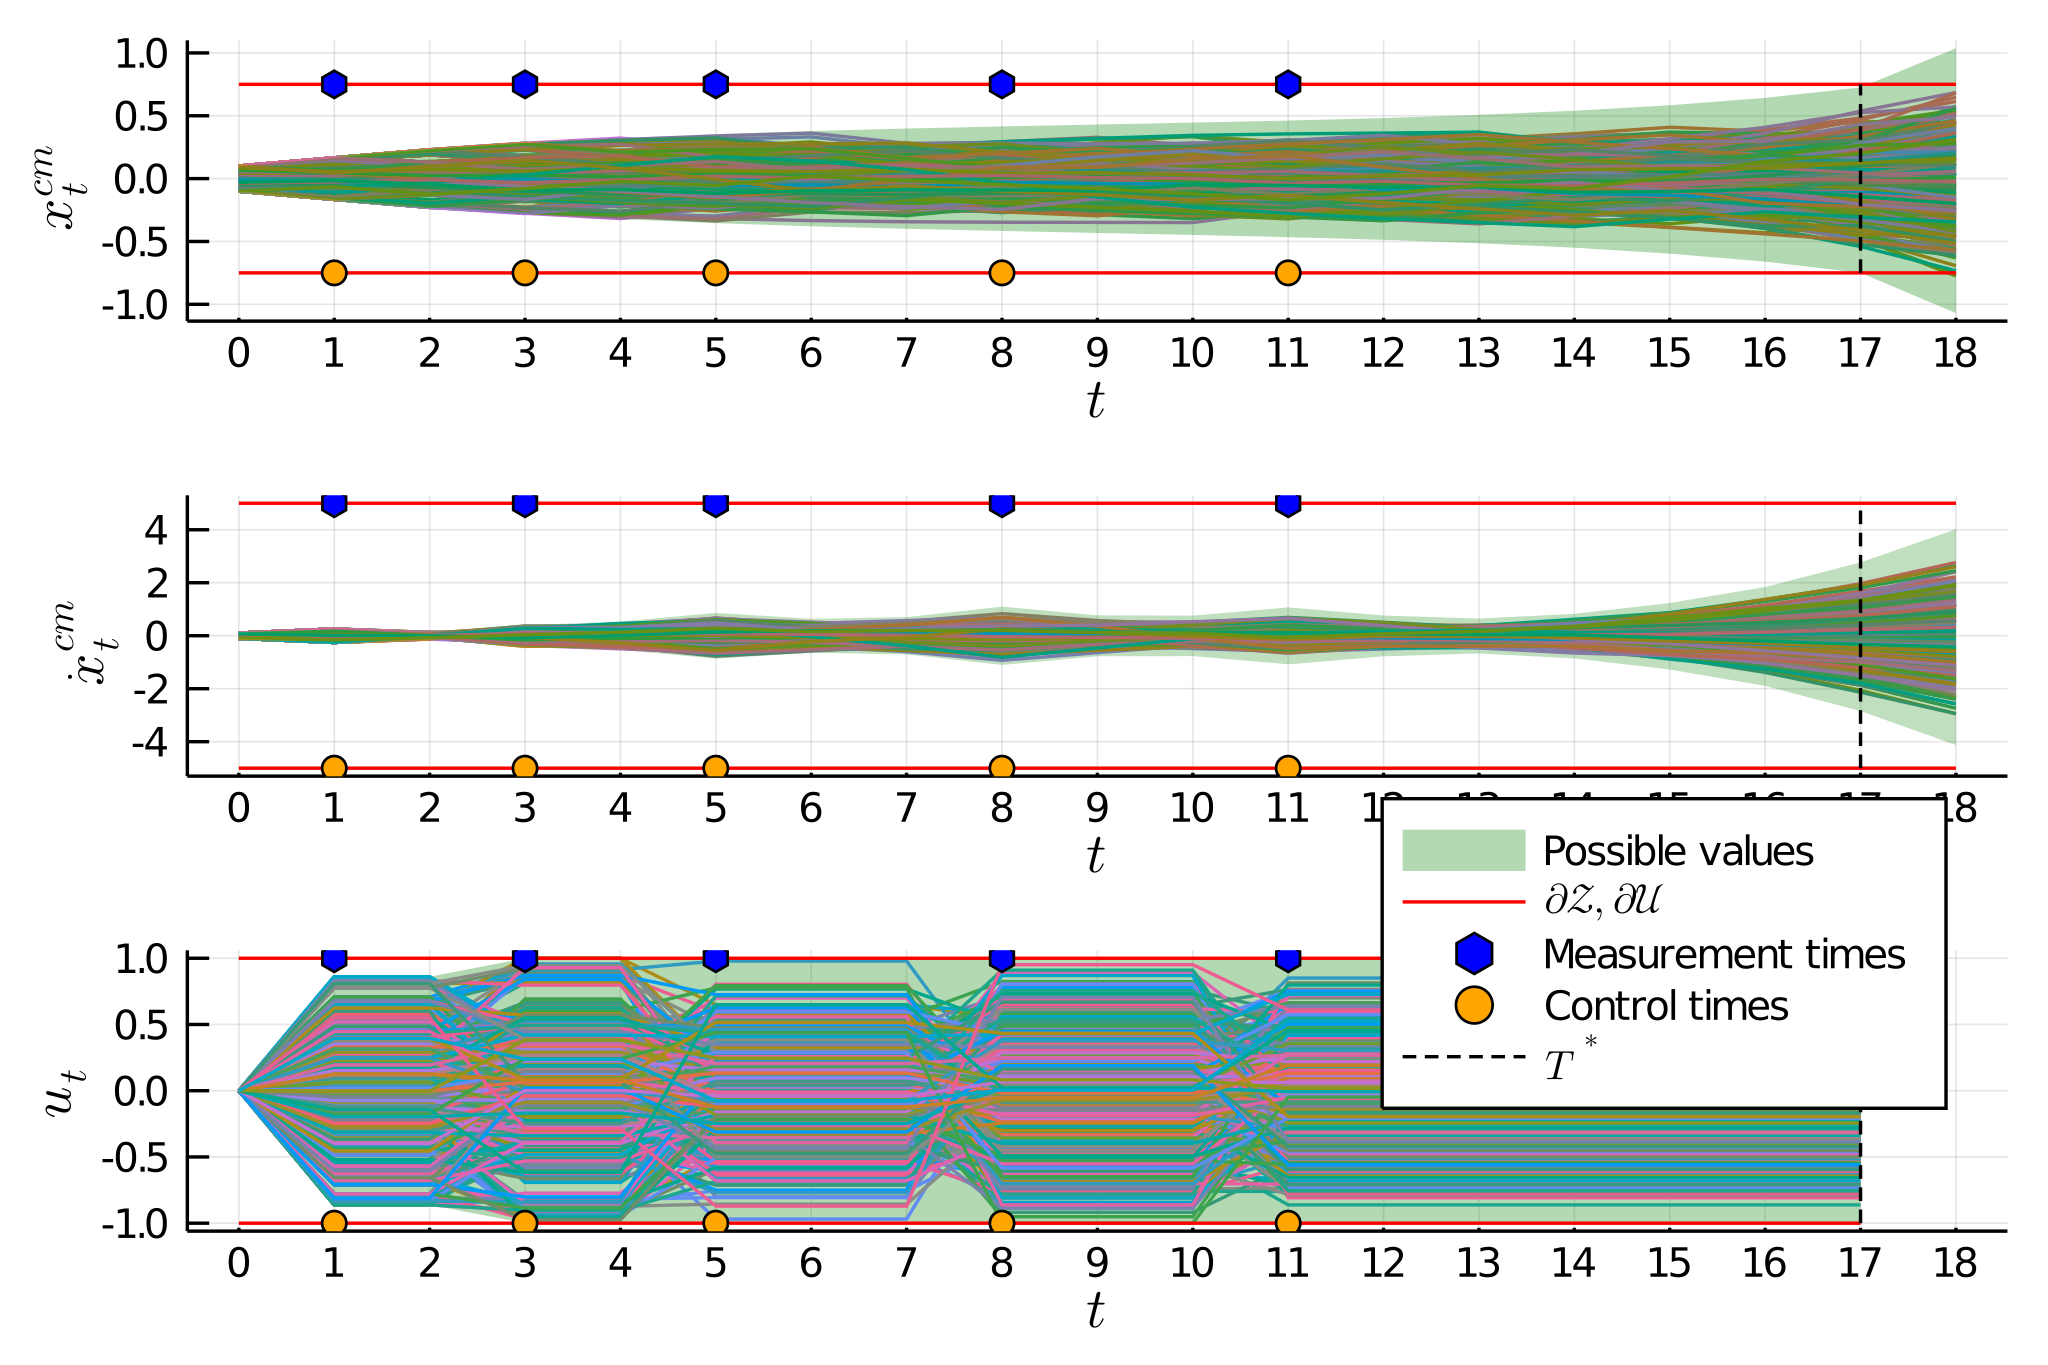

In [13]:
plot(plotList[1],plotList[2],plotList[3],layout=(3,1)) # The dimension of z and u are hardcoded...
#plot!(legend=:bottomright)
plot!(link=:x)
plot!(legend=:bottomright)
if !enforceRegular
    savefig("results/ALAP.pdf")
    #@save "results/workspace_ALAP.jld"
else
    savefig("results/ALAP_reg.pdf")
    #@save "results/workspace_ALAP_reg.jld"
end
plot!()

In [54]:
T_opt

17

In [27]:
N_m

5

In [28]:
N_c

5

In [35]:
system.C

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [36]:
system.D

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [37]:
system.A

2×2 Array{Float64,2}:
 1.04945   0.101643
 0.997118  1.04945